<a href="https://colab.research.google.com/github/dansarmiento/ColaboratoryRunningAnalysis/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from tensorflow.keras.utils import to_categorical

In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
from keras.datasets import mnist

In [4]:
# set up train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
from random import randint
from matplotlib import pyplot
%matplotlib inline 

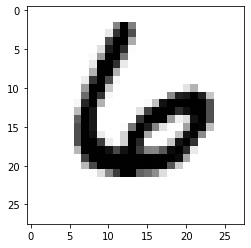

In [6]:
# look at images in the training model
pyplot.imshow(x_train[randint(0,x_train.shape[0])],cmap='gray_r');

In [7]:
# munge data 
# transform from matrix to vector, cast, and normalize
image_size = 28*28
x_train = x_train.reshape(x_train.shape[0],image_size)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],image_size)
x_test = x_test.astype('float32')
x_test /= 255

In [8]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
t_test = to_categorical(y_test, 10)

In [9]:
# import the most common type of neural network
from keras.models import Sequential


In [10]:
# define model instance
model = Sequential()

In [11]:
# import the mmost common type of network layer, fully interconnected
from keras.layers import Dense

In [12]:
# define input layer, the units are kind of arbitrary
layer_input = Dense(units=512,
                    activation='sigmoid',
                    input_shape=(image_size,))
model.add(layer_input)

In [13]:
# define another layer
model.add(Dense(units=512, activation='sigmoid'))

In [14]:
layer_output = Dense(units=10,
                     activation='softmax')
model.add(layer_output)

In [15]:
# print summary of model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
# add training parameters to architecture
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
# train the model to learn weights
training = model.fit(x_train, 
                     y_train,
                     epochs=5,
                     verbose=True,
                     validation_split=.01)

Epoch 1/5
1857/1857 [==============================] - 15s 7ms/step - loss: 2.1208 - accuracy: 0.3587 - val_loss: 1.7990 - val_accuracy: 0.5667
Epoch 2/5
1857/1857 [==============================] - 14s 8ms/step - loss: 1.3575 - accuracy: 0.7032 - val_loss: 0.8767 - val_accuracy: 0.8283
Epoch 3/5
1857/1857 [==============================] - 14s 7ms/step - loss: 0.7920 - accuracy: 0.8061 - val_loss: 0.5420 - val_accuracy: 0.8833
Epoch 4/5
1857/1857 [==============================] - 14s 7ms/step - loss: 0.5909 - accuracy: 0.8439 - val_loss: 0.4190 - val_accuracy: 0.9083
Epoch 5/5
1857/1857 [==============================] - 18s 10ms/step - loss: 0.4984 - accuracy: 0.8645 - val_loss: 0.3662 - val_accuracy: 0.9217


In [ ]:
"""
Keras other features include built-in functions like activation functions and optimizers
convolutional neural network (CNN)
recurrent neural network (RNN)
long-short term memory (LSTM)
pre-trained models
focus on what you want to do instead of how

linear algebra, probability, machine learning
"""